In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
# Initializations
x = 2
y = 1
nx = 41
ny = 41
dx = x/(nx-1)
dy = y/(ny-1)

# Defining dt
sigma = 0.09
dt = sigma*dx

# Defining arrays
xarr = np.linspace(0, x, nx)
yarr = np.linspace(0, y, ny)
print(xarr, yarr)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.  ] [0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.   ]


In [3]:
# Initializing p
p = np.zeros((nx,ny))

# Boundary conditions conditions
p[0,:] = 0
p[-1,:] = y


AttributeError: module 'numpy' has no attribute 'zeroes'

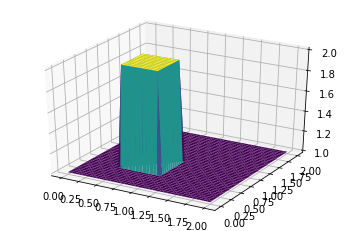

In [4]:
# Plotting the initial u and v

fig = plt.figure()
ax = plt.axes(projection='3d')
X, Y = np.meshgrid(xarr,yarr)

ax.plot_surface(X, Y, u, cmap='viridis')
ax.plot_surface(Y, Y, v, cmap='viridis')

In [5]:
def burgers(U, V, nt):
    for n in range(nt+1):
        Un = U.copy()
        Vn = V.copy()
        U[1:-1, 1:-1] = Un[1:-1, 1:-1] + dt*(nu/dx**2*(Un[2:,1:-1] - 2*Un[1:-1, 1:-1] + Un[0:-2, 1:-1]) + 
                                           nu/dy**2*(Un[1:-1, 2:] - 2*Un[1:-1, 1:-1] + Un[1:-1, 0:-2]) - 
                                           Un[1:-1, 1:-1]/dx*(Un[1:-1, 1:-1] - Un[0:-2, 1:-1]) - 
                                            Vn[1:-1, 1:-1]/dy*(Un[1:-1, 1:-1] - Un[1:-1, 0:-2]))
#         U[0,:] = 1
#         U[-1,:] = 1
#         U[:,0] = 1
#         U[:,-1] = 1
        
        V[1:-1, 1:-1] = Vn[1:-1, 1:-1] + dt*(nu/dx**2*(Vn[2:,1:-1] - 2*Vn[1:-1, 1:-1] + Vn[0:-2, 1:-1]) + 
                                           nu/dy**2*(Vn[1:-1, 2:] - 2*Vn[1:-1, 1:-1] + Vn[1:-1, 0:-2]) - 
                                           Un[1:-1, 1:-1]/dx*(Vn[1:-1, 1:-1] - Vn[0:-2, 1:-1]) - Vn[1:-1, 1:-1]/dy*(Vn[1:-1, 1:-1] - Vn[1:-1, 0:-2]))
        U[0,:] = 1
        U[-1,:] = 1
        U[:,0] = 1
        U[:,-1] = 1
        
        V[0,:] = 1
        V[-1,:] = 1
        V[:,0] = 1
        V[:,-1] = 1
        
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    ax.plot_surface(X, Y, U, cmap='viridis')
    ax.plot_surface(Y, Y, V, cmap='viridis')

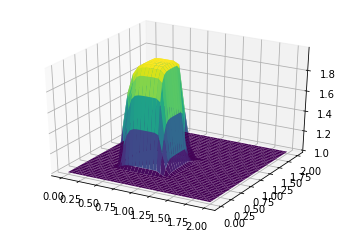

In [6]:
burgers(u, v, 120)